# Bibliotecas 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import numpy as np
from unidecode import unidecode
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D
import re
from textblob import TextBlob
import langid
import nltk
from nltk.corpus import stopwords

# Visualizacion

In [2]:
pd.options.display.float_format = '{:.2f}'.format

# Carga de datos 

In [3]:
dfcal = pd.read_csv('calendar.csv')
dfrev = pd.read_csv('reviews.csv')
dflis = pd.read_csv('listings.csv')

/tmp/ipykernel_6847/2811412816.py:3: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  dflis = pd.read_csv('listings.csv')


# Inspeccion 

In [4]:
dfcal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,$150.00,$150.00,30.00,1125.00
1,65615,2021-12-05,f,$85.00,$85.00,10.00,1125.00
2,65615,2021-12-06,f,$85.00,$85.00,10.00,1125.00
3,65615,2021-12-07,f,$85.00,$85.00,10.00,1125.00
4,65615,2021-12-08,f,$85.00,$85.00,10.00,1125.00


In [5]:
dfcal.shape

(13964535, 7)

Descripcion

listing_id: Es un identificador único para cada anuncio de Airbnb. Cada anuncio tendrá un número de listado único asociado a él.

date: Es la fecha para la que se está registrando la información. En un conjunto de datos de Airbnb, esto puede ser la fecha de disponibilidad, la fecha de reserva o la fecha en la que se recopilaron los datos.

available: Es una variable booleana (verdadero/falso) que indica si una propiedad está disponible para ser reservada en la fecha especificada. Un valor de "verdadero" significa que la propiedad está disponible, mientras que "falso" indica que no está disponible.

price: Es el precio de la propiedad para una estancia en la fecha especificada. Representa el costo de alquilar la propiedad por una noche.

adjusted_price: Es el precio ajustado de la propiedad. Puede haber ajustes en el precio base según diferentes factores, como la duración de la estancia, la temporada o las promociones especiales.

minimum_nights: Es el número mínimo de noches que se requiere reservar para la propiedad en la fecha especificada. Esto indica la duración mínima de la estancia que se permite para esa propiedad.

maximum_nights: Es el número máximo de noches que se permite reservar para la propiedad en la fecha especificada. Esto indica la duración máxima de la estancia permitida para esa propiedad.


In [6]:
dfrev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [7]:
dfrev.shape

(891964, 6)

listing_id: Es el identificador único de una propiedad en Airbnb. Cada propiedad tendrá un número de listado único asociado a ella.

id: Es el identificador único de una reseña o comentario dejado por un huésped en relación con una propiedad específica. Cada reseña tendrá un número de identificación único asociado a ella.

date: Es la fecha en la que se dejó la reseña. Representa la fecha en la que el huésped publicó su comentario.

reviewer_id: Es el identificador único del revisor o huésped que dejó la reseña. Cada huésped tendrá un número de identificación único asociado a ellos.

reviewer_name: Es el nombre del revisor o huésped que dejó la reseña. Representa el nombre del huésped que escribió el comentario.

comments: Es el contenido del comentario o reseña dejada por el huésped. Esta variable contiene el texto en el que el huésped describe su experiencia, opiniones y cualquier otra información relevante sobre la propiedad.

In [8]:
dflis.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


In [9]:
dflis.shape

(38277, 74)

id: Es el identificador único del anuncio o listado de la propiedad en Airbnb. Cada propiedad tendrá un número de identificación único asociado a ella.

listing_url: Es la URL del anuncio de la propiedad en la plataforma Airbnb. Proporciona un enlace directo al anuncio en línea donde se pueden ver más detalles e imágenes de la propiedad.

scrape_id: Es el identificador único de la operación de raspado o extracción de datos. Esta variable se utiliza a menudo en conjuntos de datos generados mediante raspado web para distinguir diferentes ejecuciones de raspado.

last_scraped: Es la fecha en la que se realizó el último raspado o extracción de datos para la propiedad. Representa la fecha en la que se obtuvieron los datos más recientes de la propiedad.

name: Es el nombre o título de la propiedad en Airbnb. Representa el nombre descriptivo o el título utilizado para anunciar la propiedad.

description: Es una descripción detallada de la propiedad. Proporciona información adicional sobre las características, comodidades, ubicación o cualquier otro detalle relevante de la propiedad.

neighborhood_overview: Es una descripción general del vecindario donde se encuentra la propiedad. Proporciona información sobre las características, atracciones, servicios y ambiente del vecindario cercano a la propiedad.

picture_url: Es la URL de la imagen principal o destacada de la propiedad. Proporciona un enlace directo a la imagen que representa visualmente la propiedad en el anuncio.

host_id: Es el identificador único del anfitrión de la propiedad en Airbnb. Cada anfitrión tendrá un número de identificación único asociado a ellos.

# Limpieza

In [10]:
#limpieza del dataset de calendario****************************************************************************

In [11]:
dfcal.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,$150.00,$150.00,30.00,1125.00
1,65615,2021-12-05,f,$85.00,$85.00,10.00,1125.00


In [12]:
dfcal.dtypes #veo tipo de variables 

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [13]:
dfcal.isnull() #identifico los valores nulos 

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13964530,False,False,False,False,False,False,False
13964531,False,False,False,False,False,False,False
13964532,False,False,False,False,False,False,False
13964533,False,False,False,False,False,False,False


In [14]:
dfcal.isnull().sum()  # sumo los valores nulos para identificarlos 

listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      2
maximum_nights      2
dtype: int64

In [15]:
dfcal = dfcal.dropna() # elimino las celdas con los valores nulos 

In [16]:
dfcal.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [17]:
dfcal['available'] = dfcal['available'].astype('category')

In [18]:
dfcal.describe()

,listing_id,minimum_nights,maximum_nights
count,13964362.00,13964362.00,13964362.00
mean,29614831.55,27.20,2239856.29
std,17422838.36,68.87,69289870.36
min,2595.00,1.00,1.00
25%,13398837.00,3.00,365.00
50%,30799727.00,30.00,1125.00
75%,46428025.00,30.00,1125.00
max,53665099.00,1250.00,2147483647.00


In [19]:
dfcal['price'] = dfcal['price'].apply(lambda x: re.sub('[^\d.]', '', str(x)))
dfcal['adjusted_price'] = dfcal['adjusted_price'].apply(lambda x: re.sub('[^\d.]', '', str(x)))
dfcal['price'] = pd.to_numeric(dfcal['price'])
dfcal['adjusted_price'] = pd.to_numeric(dfcal['adjusted_price'])

In [20]:
dfcal.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,150.00,150.00,30.00,1125.00
1,65615,2021-12-05,f,85.00,85.00,10.00,1125.00
2,65615,2021-12-06,f,85.00,85.00,10.00,1125.00
3,65615,2021-12-07,f,85.00,85.00,10.00,1125.00
4,65615,2021-12-08,f,85.00,85.00,10.00,1125.00


In [21]:
dfcal.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,13964362.00,13964362.00,13964362.00,13964362.00,13964362.00
mean,29614831.55,172.01,171.72,27.20,2239856.29
std,17422838.36,318.52,317.46,68.87,69289870.36
min,2595.00,0.00,0.00,1.00,1.00
25%,13398837.00,70.00,70.00,3.00,365.00
50%,30799727.00,115.00,115.00,30.00,1125.00
75%,46428025.00,189.00,189.00,30.00,1125.00
max,53665099.00,14030.00,14030.00,1250.00,2147483647.00


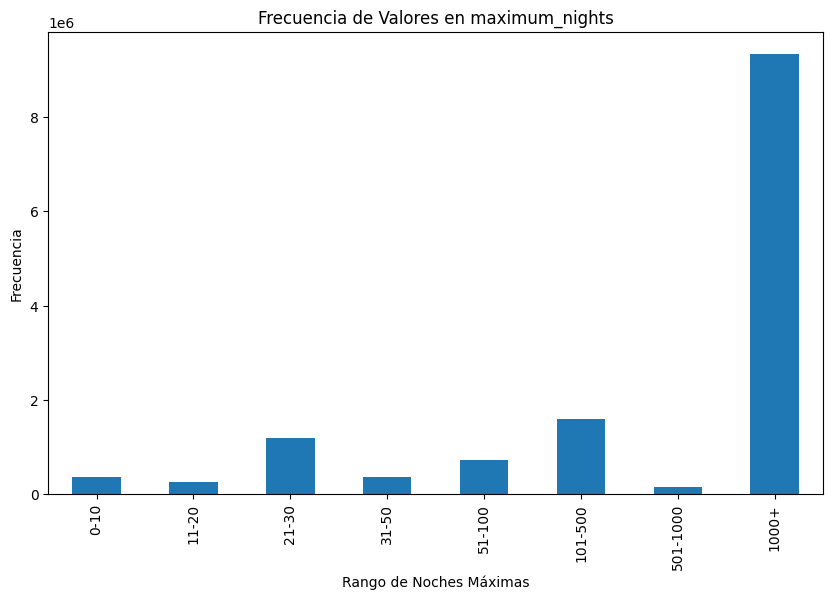

In [22]:
bins = [0, 10, 20, 30, 50, 100, 500, 1000, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-50', '51-100', '101-500', '501-1000', '1000+']
grouped = dfcal['maximum_nights'].groupby(pd.cut(dfcal['maximum_nights'], bins=bins, labels=labels)).count()
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.title('Frecuencia de Valores en maximum_nights')
plt.xlabel('Rango de Noches Máximas')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
listing_id_head = dfcal['listing_id'].head(5000)
print(listing_id_head)

0        2595
1       65615
2       65615
3       65615
4       65615
        ...  
4995    32037
4996    32037
4997    32037
4998    32037
4999    32037
Name: listing_id, Length: 5000, dtype: int64


In [24]:
dfcal_grouped = dfcal.groupby('listing_id').mean()

/tmp/ipykernel_6847/3214311513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfcal_grouped = dfcal.groupby('listing_id').mean()


In [25]:
# Limpieza del dataset de review**************************************************************************

In [26]:
dfrev.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...


In [27]:
dfrev.isnull()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
891959,False,False,False,False,False,False
891960,False,False,False,False,False,False
891961,False,False,False,False,False,False
891962,False,False,False,False,False,False


In [28]:
dfrev.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      6
comments         886
dtype: int64

In [29]:
dfrev = dfrev.dropna() # elimino las celdas con los valores nulos 

In [30]:
dfrev.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [31]:
dfrev.shape

(891072, 6)

In [32]:
dfrev.dtypes #veo tipo de variables 

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [33]:
print(dfrev['comments'].sample(10))

821373    Room was clean and private. Nice big windows f...
830728                              Very relaxing & private
310661    Great communication. Super easy check-in...eve...
587836    Shera’s place is very cozy. She is very organi...
395277    Nice and friendly Place, good Restaurants, Gre...
462049    Dwayne is a great host and has a beautiful hom...
721214      Great place to experience and explore New York!
235543    Elisa's place is really super convenient form ...
483047    Great space, great location, exactly as advert...
607236    Perfect apartment for a stay in New York City....
Name: comments, dtype: object


In [34]:
dfrev.loc[:, 'comments'] = dfrev['comments'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# eliminamos caracteres especiales
dfrev['comments'] = dfrev['comments'].apply(lambda x: unidecode(x))

In [35]:
dfrev['comments'] = dfrev['comments'].str.lower().apply(lambda x: re.sub(r'^\s+', '', x))




In [36]:
print(dfrev['comments'].sample(10)) 

749879    clean close to broadway and central park  grea...
168386    i traveled to new york with 3 people and all o...
141616    the reservation was canceled 36 days before ar...
225253    the apartment was perfect for the 4 of us incl...
675683    had a great stay here place is exactly as desc...
580356    tres bon logement rapport qualite prixbrtres p...
371150    great apartment nice hosts and very close to t...
614597    the apartment wasnt especially clean but the v...
93179                        a nice place for a great price
342618                                          great place
Name: comments, dtype: object


In [37]:
dfrev['comments'] = dfrev['comments'].str.strip()

In [38]:
from translate import Translator
translator = Translator(to_lang='en')
dfrev['comments_translated'] = dfrev['comments'].apply(lambda x: translator.translate(x))

In [39]:
print(dfrev['comments_translated'].sample(30)) 

677595    the location is amazing the apartment was clea...
327245    great spot very central and with everything yo...
157980    matt  tracy were very amicable and easygoing h...
760686                      cool calm place will stay again
744978                                          great place
479085                  awesome hospitable and clean thanks
889990    enjoyed the check in very nice great irish pub...
110930                      very nice host and out standing
613739    bon accueil keisha et son mari sont tres react...
426878                                              allez y
375575    we had a great stay in brooklyn  jt and his wi...
468597    the apartment was the right size for our famil...
83842     le sejour etait tout simplement parfait\rbrjul...
146760    the apartment was clean spacious and well furn...
314616    spacious apartment sparkly clean toilets and r...
433611    very clean and not a long commute to manhattan...
759812    paul and cookies are really go

In [40]:
dfrev.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_translated
0,2595,17857,2009-11-21,50679,Jean,notre sejour de trois nuits\rbrnous avons appr...,notre sejour de trois nuits\rbrnous avons appr...
1,2595,19176,2009-12-05,53267,Cate,great experience,great experience
2,2595,19760,2009-12-10,38960,Anita,ive stayed with my friend at the midtown castl...,ive stayed with my friend at the midtown castl...
3,2595,34320,2010-04-09,71130,Kai-Uwe,weve been staying here for about 9 nights enjo...,weve been staying here for about 9 nights enjo...
4,2595,46312,2010-05-25,117113,Alicia,we had a wonderful stay at jennifers charming ...,we had a wonderful stay at jennifers charming ...
5,2595,1238204,2012-05-07,1783688,Sergey,hi to everyone\rbrwould say our greatest compl...,hi to everyone\rbrwould say our greatest compl...
6,2595,1293632,2012-05-17,1870771,Loïc,jennifer was very friendly and helpful and her...,jennifer was very friendly and helpful and her...
7,2595,2022498,2012-08-18,2124102,Melanie,this apartment is like a real castle old and u...,this apartment is like a real castle old and u...
8,2595,4682989,2013-05-20,496053,Eric,jennifers place was in a great midtown locatio...,jennifers place was in a great midtown locatio...
9,2595,13193832,2014-05-21,13685934,Gerald,jennifer is a very nice host everything is cle...,jennifer is a very nice host everything is cle...


In [41]:
regex = r'[\u3040-\u30ff\u3131-\u3163\uac00-\ud7a3]'
dfrev = dfrev[~dfrev['comments'].str.contains(regex, flags=re.UNICODE)]

In [42]:
dfrev.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_translated
0,2595,17857,2009-11-21,50679,Jean,notre sejour de trois nuits\rbrnous avons appr...,notre sejour de trois nuits\rbrnous avons appr...
1,2595,19176,2009-12-05,53267,Cate,great experience,great experience
2,2595,19760,2009-12-10,38960,Anita,ive stayed with my friend at the midtown castl...,ive stayed with my friend at the midtown castl...
3,2595,34320,2010-04-09,71130,Kai-Uwe,weve been staying here for about 9 nights enjo...,weve been staying here for about 9 nights enjo...
4,2595,46312,2010-05-25,117113,Alicia,we had a wonderful stay at jennifers charming ...,we had a wonderful stay at jennifers charming ...
5,2595,1238204,2012-05-07,1783688,Sergey,hi to everyone\rbrwould say our greatest compl...,hi to everyone\rbrwould say our greatest compl...
6,2595,1293632,2012-05-17,1870771,Loïc,jennifer was very friendly and helpful and her...,jennifer was very friendly and helpful and her...
7,2595,2022498,2012-08-18,2124102,Melanie,this apartment is like a real castle old and u...,this apartment is like a real castle old and u...
8,2595,4682989,2013-05-20,496053,Eric,jennifers place was in a great midtown locatio...,jennifers place was in a great midtown locatio...
9,2595,13193832,2014-05-21,13685934,Gerald,jennifer is a very nice host everything is cle...,jennifer is a very nice host everything is cle...


In [43]:
print(dfrev['comments_translated'].sample(30)) 

260890    irvings place was as described in the pics qui...
54551     accueil vraiment sympathique logement calme co...
855658    la ubicacion es muy buena hay dos estaciones d...
871325    the place was great check in and check out was...
548526       todo excelente  alojamiento  ubicacion  precio
63779     tres bon emplacement proche dune station de me...
797217                            very nice and clean space
773446    eliana provided everything you could possibly ...
180418    lappartement de laurent convient bien pour 2 p...
501598    ulys place is great brgreat location very walk...
205321    i had a pleasant stay at this place it is near...
412941                       perfect location and comfy bed
49401     magnifique apartment vue superbe et tres calme...
539989    superbe appartement nous avons passe une semai...
583707    sophias place is great its very convenient acr...
713954    great stay was clean  comfy read the descripti...
729492    the elevator system is horribl

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/luis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stop_words = set(stopwords.words('english'))

In [46]:
dfrev['comments_translated'] = dfrev['comments_translated'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [47]:
dfrev.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_translated
0,2595,17857,2009-11-21,50679,Jean,notre sejour de trois nuits\rbrnous avons appr...,notre sejour de trois nuits brnous avons appre...
1,2595,19176,2009-12-05,53267,Cate,great experience,great experience
2,2595,19760,2009-12-10,38960,Anita,ive stayed with my friend at the midtown castl...,ive stayed friend midtown castle six days love...
3,2595,34320,2010-04-09,71130,Kai-Uwe,weve been staying here for about 9 nights enjo...,weve staying 9 nights enjoying center city nev...
4,2595,46312,2010-05-25,117113,Alicia,we had a wonderful stay at jennifers charming ...,wonderful stay jennifers charming apartment or...
5,2595,1238204,2012-05-07,1783688,Sergey,hi to everyone\rbrwould say our greatest compl...,hi everyone brwould say greatest compliments j...
6,2595,1293632,2012-05-17,1870771,Loïc,jennifer was very friendly and helpful and her...,jennifer friendly helpful place exactly advert...
7,2595,2022498,2012-08-18,2124102,Melanie,this apartment is like a real castle old and u...,apartment like real castle old unique age rela...
8,2595,4682989,2013-05-20,496053,Eric,jennifers place was in a great midtown locatio...,jennifers place great midtown location close s...
9,2595,13193832,2014-05-21,13685934,Gerald,jennifer is a very nice host everything is cle...,jennifer nice host everything clean really tak...


In [48]:
def analyze_sentiment(comment):
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity
    return sentiment
dfrev['sentiment'] = dfrev['comments_translated'].map(analyze_sentiment)

In [49]:
dfrev.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_translated,sentiment
0,2595,17857,2009-11-21,50679,Jean,notre sejour de trois nuits\rbrnous avons appr...,notre sejour de trois nuits brnous avons appre...,0.90
1,2595,19176,2009-12-05,53267,Cate,great experience,great experience,0.80
2,2595,19760,2009-12-10,38960,Anita,ive stayed with my friend at the midtown castl...,ive stayed friend midtown castle six days love...,0.46
3,2595,34320,2010-04-09,71130,Kai-Uwe,weve been staying here for about 9 nights enjo...,weve staying 9 nights enjoying center city nev...,0.26
4,2595,46312,2010-05-25,117113,Alicia,we had a wonderful stay at jennifers charming ...,wonderful stay jennifers charming apartment or...,0.57


In [50]:
dfrev_unique = dfrev.drop_duplicates(subset='listing_id', keep='first')
dfrev_grouped = dfrev.groupby('listing_id')['sentiment'].mean().reset_index()
print(dfrev_unique)
print(dfrev_grouped)

        listing_id                  id        date  reviewer_id reviewer_name  \
0             2595               17857  2009-11-21        50679          Jean   
48            3831            20509269  2014-09-30     20417598      Courtney   
457           5121                3271  2009-05-28         2995         Misha   
507           5136             9549695  2014-01-02      3585271         Elise   
509           5178                2091  2009-05-06         8443       Dimitri   
...            ...                 ...         ...          ...           ...   
891958    53572597  510103538650624978  2021-12-04    341274952     Rakshanda   
891959    53609786  508714999062086277  2021-12-02     56267284        Mathew   
891961    53612732  509403683179062336  2021-12-03     65072448         Divya   
891962    53614162  508723153064804388  2021-12-02     60399002          Andy   
891963    53648074  510101726158799786  2021-12-04    416539996       Melissa   

                           

In [51]:
dfrev_grouped.describe()

,listing_id,sentiment
count,28768.00,28768.00
mean,27310250.77,0.38
std,16905696.15,0.14
min,2595.00,-1.00
25%,12206249.50,0.33
50%,27131503.50,0.39
75%,43019032.50,0.45
max,53648074.00,1.00


In [52]:
# LImpieza de listings****************************************************************************************

In [53]:
dflis.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


In [54]:
column_names = dflis.columns
print(column_names)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

    Descripción: 'description'
    Vecindario: 'neighbourhood'
    Tipo de propiedad: 'property_type'
    Tipo de habitación: 'room_type'
    Número de habitaciones: 'bedrooms'
    Número de baños: 'bathrooms'
    Capacidad de alojamiento: 'accommodates'
    Puntuación general de los huéspedes: 'review_scores_rating'
    Puntuación de precisión: 'review_scores_accuracy'
    Puntuación de limpieza: 'review_scores_cleanliness'
    Puntuación de check-in: 'review_scores_checkin'
    Puntuación de comunicación: 'review_scores_communication'
    Puntuación de ubicación: 'review_scores_location'
    Puntuación de valor: 'review_scores_value'
    Comentarios de los huéspedes: 'number_of_reviews' y 'reviews_per_month'

Estas variables abarcan aspectos importantes de la propiedad y la experiencia de los huéspedes que pueden influir en la similitud entre los listados de Airbnb. Ten en cuenta que también puedes considerar otras variables según las necesidades específicas de tu análisis y el tipo de similitud que deseas capturar.


In [55]:
columns_to_keep = ['id', 'scrape_id', 'name', 'description', 'neighbourhood', 'property_type', 'room_type', 'bedrooms', 'accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'reviews_per_month', 'amenities']

dflis = dflis[columns_to_keep]

In [56]:
dflis.head(3)

,id,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,amenities
0,2595,20211204143024,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,4.72,4.62,4.76,4.79,4.86,4.41,48,0.33,"[""Extra pillows and blankets"", ""Baking sheet"",..."
1,3831,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...","Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,4.58,4.49,4.78,4.80,4.71,4.64,409,4.86,"[""Extra pillows and blankets"", ""Luggage dropof..."
2,5121,20211204143024,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,Private room in rental unit,Private room,1.00,2,4.52,4.22,4.09,4.91,4.91,4.47,4.52,50,0.52,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",..."


In [57]:
dflis.isnull()

,id,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,amenities
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,False,True,False
38273,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,False,True,False
38274,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,False,True,False
38275,False,False,False,True,True,False,False,False,False,True,True,True,True,True,True,True,False,True,False


In [58]:
dflis.isnull().sum()

id                                 0
scrape_id                          0
name                              13
description                     1192
neighbourhood                  15626
property_type                      0
room_type                          0
bedrooms                        3975
accommodates                       0
review_scores_rating            9504
review_scores_accuracy         10116
review_scores_cleanliness      10105
review_scores_checkin          10123
review_scores_communication    10112
review_scores_location         10126
review_scores_value            10127
number_of_reviews                  0
reviews_per_month               9504
amenities                          0
dtype: int64

In [59]:
dflis.dtypes

id                               int64
scrape_id                        int64
name                            object
description                     object
neighbourhood                   object
property_type                   object
room_type                       object
bedrooms                       float64
accommodates                     int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
reviews_per_month              float64
amenities                       object
dtype: object

In [60]:
dflis['description'] = dflis['description'].fillna('noinfo')

In [61]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    text = re.sub('\s+', ' ', text).strip()
    
    return text
dflis['description'] = dflis['description'].map(clean_text)

In [62]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
dflis['description_tokenized'] = dflis['description'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /home/luis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
dflis.head(2)

,id,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,amenities,description_tokenized
0,2595,20211204143024,Skylit Midtown Castle,beautiful spacious skylit studio in the heart ...,"New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,4.72,4.62,4.76,4.79,4.86,4.41,48,0.33,"[""Extra pillows and blankets"", ""Baking sheet"",...","[beautiful, spacious, skylit, studio, in, the,..."
1,3831,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...",enjoy 500 s f top floor in 1899 brownstone w w...,"Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,4.58,4.49,4.78,4.80,4.71,4.64,409,4.86,"[""Extra pillows and blankets"", ""Luggage dropof...","[enjoy, 500, s, f, top, floor, in, 1899, brown..."


In [64]:
dflis['neighbourhood'] = dflis['neighbourhood'].fillna('noinfo')

In [65]:
property_type_values = dflis['property_type'].unique()
print(property_type_values)

['Entire rental unit' 'Entire guest suite' 'Private room in rental unit'
 'Private room in townhouse' 'Private room in condominium (condo)'
 'Private room in loft' 'Entire loft' 'Private room in residential home'
 'Entire condominium (condo)' 'Entire residential home' 'Entire townhouse'
 'Private room in bed and breakfast' 'Entire guesthouse'
 'Private room in guest suite' 'Room in boutique hotel'
 'Shared room in loft' 'Shared room in rental unit'
 'Shared room in residential home' 'Private room' 'Private room in hostel'
 'Entire place' 'Private room in guesthouse' 'Boat'
 'Entire serviced apartment' 'Room in aparthotel' 'Floor'
 'Private room in vacation home' 'Room in serviced apartment'
 'Entire cottage' 'Private room in serviced apartment' 'Room in hotel'
 'Cave' 'Tiny house' 'Private room in floor'
 'Shared room in condominium (condo)' 'Entire bungalow'
 'Private room in casa particular' 'Shared room in townhouse' 'Houseboat'
 'Private room in bungalow' 'Entire villa' 'Private ro

In [66]:
dflis['space_type'] = dflis['property_type'].map(lambda x: 'House or Cabin' if any(word in x.lower() for word in ['house', 'cabin']) else 'Private Room' if 'private room' in x.lower() else 'Shared Room' if 'shared room' in x.lower() else 'Entire Rental Unit' if 'entire rental unit' in x.lower() else 'Entire Guest Suite' if 'entire guest suite' in x.lower() else 'Entire Condominium' if 'entire condominium' in x.lower() else 'Entire Residential Home' if 'entire residential home' in x.lower() else 'Entire Townhouse' if 'entire townhouse' in x.lower() else 'Entire Guesthouse' if 'entire guesthouse' in x.lower() else 'Entire Serviced Apartment' if 'entire serviced apartment' in x.lower() else 'Entire Cottage' if 'entire cottage' in x.lower() else 'Entire Villa' if 'entire villa' in x.lower() else 'Entire Bed and Breakfast' if 'entire bed and breakfast' in x.lower() else x)

In [67]:
dflis.head(3)

,id,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,amenities,description_tokenized,space_type
0,2595,20211204143024,Skylit Midtown Castle,beautiful spacious skylit studio in the heart ...,"New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,...,4.62,4.76,4.79,4.86,4.41,48,0.33,"[""Extra pillows and blankets"", ""Baking sheet"",...","[beautiful, spacious, skylit, studio, in, the,...",Entire Rental Unit
1,3831,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...",enjoy 500 s f top floor in 1899 brownstone w w...,"Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,...,4.49,4.78,4.80,4.71,4.64,409,4.86,"[""Extra pillows and blankets"", ""Luggage dropof...","[enjoy, 500, s, f, top, floor, in, 1899, brown...",Entire Guest Suite
2,5121,20211204143024,BlissArtsSpace!,the spacehello everyone and thanks for visitin...,noinfo,Private room in rental unit,Private room,1.00,2,4.52,...,4.09,4.91,4.91,4.47,4.52,50,0.52,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",...","[the, spacehello, everyone, and, thanks, for, ...",Private Room


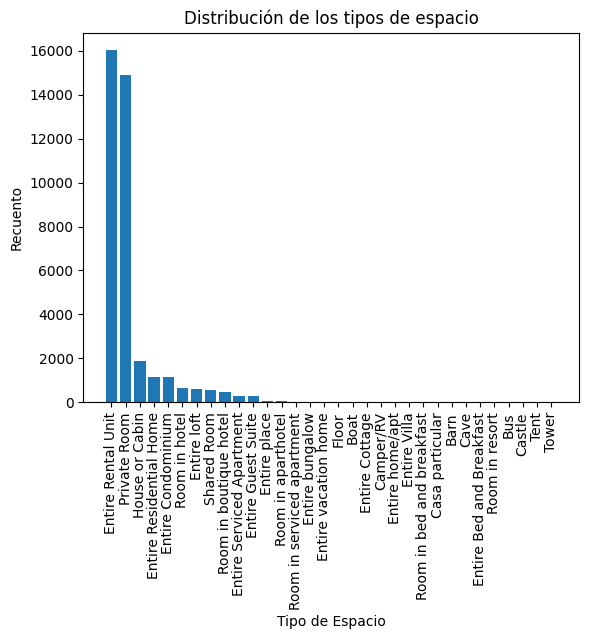

In [68]:
space_counts = dflis['space_type'].value_counts()
plt.bar(space_counts.index, space_counts.values)
plt.title('Distribución de los tipos de espacio')
plt.xlabel('Tipo de Espacio')
plt.ylabel('Recuento')
plt.xticks(rotation=90)
plt.show()

In [70]:
def clean_amenities(amenities):

    cleaned_amenities = re.sub(r"[\[\]\"]", "", amenities)
    return cleaned_amenities.strip()
dflis['amenities'] = dflis['amenities'].apply(clean_amenities)


In [71]:
dflis['amenities_tokens'] = dflis['amenities'].apply(lambda x: word_tokenize(x))

In [72]:
dflis.head(3)

,id,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,amenities,description_tokenized,space_type,amenities_tokens
0,2595,20211204143024,Skylit Midtown Castle,beautiful spacious skylit studio in the heart ...,"New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,...,4.76,4.79,4.86,4.41,48,0.33,"Extra pillows and blankets, Baking sheet, Lugg...","[beautiful, spacious, skylit, studio, in, the,...",Entire Rental Unit,"[Extra, pillows, and, blankets, ,, Baking, she..."
1,3831,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...",enjoy 500 s f top floor in 1899 brownstone w w...,"Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,...,4.78,4.80,4.71,4.64,409,4.86,"Extra pillows and blankets, Luggage dropoff al...","[enjoy, 500, s, f, top, floor, in, 1899, brown...",Entire Guest Suite,"[Extra, pillows, and, blankets, ,, Luggage, dr..."
2,5121,20211204143024,BlissArtsSpace!,the spacehello everyone and thanks for visitin...,noinfo,Private room in rental unit,Private room,1.00,2,4.52,...,4.91,4.91,4.47,4.52,50,0.52,"Kitchen, Long term stays allowed, Wifi, Heatin...","[the, spacehello, everyone, and, thanks, for, ...",Private Room,"[Kitchen, ,, Long, term, stays, allowed, ,, Wi..."


In [73]:
dflis.describe()

,id,scrape_id,bedrooms,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month
count,38277.00,38277.00,34302.00,38277.00,28773.00,28161.00,28172.00,28154.00,28165.00,28151.00,28150.00,38277.00,28773.00
mean,29622391.36,20211204143024.00,1.32,2.79,4.59,4.74,4.61,4.81,4.81,4.75,4.65,23.30,1.72
std,17422394.08,0.00,0.71,1.87,0.84,0.50,0.58,0.44,0.47,0.42,0.52,50.42,4.40
min,2595.00,20211204143024.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
25%,13410478.00,20211204143024.00,1.00,2.00,4.57,4.70,4.50,4.80,4.81,4.67,4.55,1.00,0.12
50%,30812691.00,20211204143024.00,1.00,2.00,4.82,4.90,4.80,4.96,4.97,4.88,4.78,4.00,0.48
75%,46428551.00,20211204143024.00,1.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,20.00,1.78
max,53665099.00,20211204143024.00,16.00,16.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1009.00,141.00


In [74]:
median_review_scores_rating = dflis["review_scores_rating"].median()
median_review_scores_location = dflis["review_scores_location"].median()
median_review_scores_cleanliness = dflis["review_scores_cleanliness"].median()
dflis["review_scores_rating"].fillna(median_review_scores_rating, inplace=True)
dflis["review_scores_location"].fillna(median_review_scores_location, inplace=True)
dflis["review_scores_cleanliness"].fillna(median_review_scores_cleanliness, inplace=True)

In [75]:
dflis.isnull().sum()

id                                 0
scrape_id                          0
name                              13
description                        0
neighbourhood                      0
property_type                      0
room_type                          0
bedrooms                        3975
accommodates                       0
review_scores_rating               0
review_scores_accuracy         10116
review_scores_cleanliness          0
review_scores_checkin          10123
review_scores_communication    10112
review_scores_location             0
review_scores_value            10127
number_of_reviews                  0
reviews_per_month               9504
amenities                          0
description_tokenized              0
space_type                         0
amenities_tokens                   0
dtype: int64

In [76]:
dflis.head(5)

,id,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,amenities,description_tokenized,space_type,amenities_tokens
0,2595,20211204143024,Skylit Midtown Castle,beautiful spacious skylit studio in the heart ...,"New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,...,4.76,4.79,4.86,4.41,48,0.33,"Extra pillows and blankets, Baking sheet, Lugg...","[beautiful, spacious, skylit, studio, in, the,...",Entire Rental Unit,"[Extra, pillows, and, blankets, ,, Baking, she..."
1,3831,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...",enjoy 500 s f top floor in 1899 brownstone w w...,"Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,...,4.78,4.80,4.71,4.64,409,4.86,"Extra pillows and blankets, Luggage dropoff al...","[enjoy, 500, s, f, top, floor, in, 1899, brown...",Entire Guest Suite,"[Extra, pillows, and, blankets, ,, Luggage, dr..."
2,5121,20211204143024,BlissArtsSpace!,the spacehello everyone and thanks for visitin...,noinfo,Private room in rental unit,Private room,1.00,2,4.52,...,4.91,4.91,4.47,4.52,50,0.52,"Kitchen, Long term stays allowed, Wifi, Heatin...","[the, spacehello, everyone, and, thanks, for, ...",Private Room,"[Kitchen, ,, Long, term, stays, allowed, ,, Wi..."
3,5136,20211204143024,"Spacious Brooklyn Duplex, Patio + Garden",we welcome you to stay in our lovely 2 br dupl...,noinfo,Entire rental unit,Entire home/apt,2.00,4,5.00,...,5.00,5.00,4.50,5.00,2,0.02,"Kitchen, BBQ grill, Cable TV, Carbon monoxide ...","[we, welcome, you, to, stay, in, our, lovely, ...",Entire Rental Unit,"[Kitchen, ,, BBQ, grill, ,, Cable, TV, ,, Carb..."
4,5178,20211204143024,Large Furnished Room Near B'way,please don t expect the luxury here just a bas...,"New York, United States",Private room in rental unit,Private room,1.00,2,4.21,...,4.66,4.42,4.87,4.36,507,3.68,"Room-darkening shades, Lock on bedroom door, S...","[please, don, t, expect, the, luxury, here, ju...",Private Room,"[Room-darkening, shades, ,, Lock, on, bedroom,..."


In [77]:
dfcal_grouped.head(5)

,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,
2595,198.44,198.44,30.00,1125.00
3831,76.14,76.14,1.00,730.00
5121,60.00,60.00,30.00,730.00
5136,275.00,275.00,5.00,1125.00
5178,68.00,68.00,2.00,14.00


In [78]:
dfrev_grouped.head(5)

,listing_id,sentiment
0,2595,0.35
1,3831,0.36
2,5121,0.38
3,5136,0.45
4,5178,0.30


In [79]:
dfcal_grouped.reset_index(inplace=True)
df_combined = pd.merge(dflis,
                       dfcal_grouped[['listing_id', 'minimum_nights', 'maximum_nights']],
                       left_on='id', right_on='listing_id',
                       how='inner')

df_combined = pd.merge(df_combined,
                       dfrev_grouped[['listing_id', 'sentiment']],
                       left_on='id', right_on='listing_id',
                       how='inner')
df_combined.drop(columns=['id'], inplace=True)
df_combined.head()

,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,review_scores_accuracy,...,reviews_per_month,amenities,description_tokenized,space_type,amenities_tokens,listing_id_x,minimum_nights,maximum_nights,listing_id_y,sentiment
0,20211204143024,Skylit Midtown Castle,beautiful spacious skylit studio in the heart ...,"New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,4.72,...,0.33,"Extra pillows and blankets, Baking sheet, Lugg...","[beautiful, spacious, skylit, studio, in, the,...",Entire Rental Unit,"[Extra, pillows, and, blankets, ,, Baking, she...",2595,30.00,1125.00,2595,0.35
1,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...",enjoy 500 s f top floor in 1899 brownstone w w...,"Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,4.58,...,4.86,"Extra pillows and blankets, Luggage dropoff al...","[enjoy, 500, s, f, top, floor, in, 1899, brown...",Entire Guest Suite,"[Extra, pillows, and, blankets, ,, Luggage, dr...",3831,1.00,730.00,3831,0.36
2,20211204143024,BlissArtsSpace!,the spacehello everyone and thanks for visitin...,noinfo,Private room in rental unit,Private room,1.00,2,4.52,4.22,...,0.52,"Kitchen, Long term stays allowed, Wifi, Heatin...","[the, spacehello, everyone, and, thanks, for, ...",Private Room,"[Kitchen, ,, Long, term, stays, allowed, ,, Wi...",5121,30.00,730.00,5121,0.38
3,20211204143024,"Spacious Brooklyn Duplex, Patio + Garden",we welcome you to stay in our lovely 2 br dupl...,noinfo,Entire rental unit,Entire home/apt,2.00,4,5.00,5.00,...,0.02,"Kitchen, BBQ grill, Cable TV, Carbon monoxide ...","[we, welcome, you, to, stay, in, our, lovely, ...",Entire Rental Unit,"[Kitchen, ,, BBQ, grill, ,, Cable, TV, ,, Carb...",5136,5.00,1125.00,5136,0.45
4,20211204143024,Large Furnished Room Near B'way,please don t expect the luxury here just a bas...,"New York, United States",Private room in rental unit,Private room,1.00,2,4.21,4.21,...,3.68,"Room-darkening shades, Lock on bedroom door, S...","[please, don, t, expect, the, luxury, here, ju...",Private Room,"[Room-darkening, shades, ,, Lock, on, bedroom,...",5178,2.00,14.00,5178,0.30


In [80]:
df_combined.head()

,scrape_id,name,description,neighbourhood,property_type,room_type,bedrooms,accommodates,review_scores_rating,review_scores_accuracy,...,reviews_per_month,amenities,description_tokenized,space_type,amenities_tokens,listing_id_x,minimum_nights,maximum_nights,listing_id_y,sentiment
0,20211204143024,Skylit Midtown Castle,beautiful spacious skylit studio in the heart ...,"New York, United States",Entire rental unit,Entire home/apt,NaN,1,4.70,4.72,...,0.33,"Extra pillows and blankets, Baking sheet, Lugg...","[beautiful, spacious, skylit, studio, in, the,...",Entire Rental Unit,"[Extra, pillows, and, blankets, ,, Baking, she...",2595,30.00,1125.00,2595,0.35
1,20211204143024,"Whole flr w/private bdrm, bath & kitchen(pls r...",enjoy 500 s f top floor in 1899 brownstone w w...,"Brooklyn, New York, United States",Entire guest suite,Entire home/apt,1.00,3,4.45,4.58,...,4.86,"Extra pillows and blankets, Luggage dropoff al...","[enjoy, 500, s, f, top, floor, in, 1899, brown...",Entire Guest Suite,"[Extra, pillows, and, blankets, ,, Luggage, dr...",3831,1.00,730.00,3831,0.36
2,20211204143024,BlissArtsSpace!,the spacehello everyone and thanks for visitin...,noinfo,Private room in rental unit,Private room,1.00,2,4.52,4.22,...,0.52,"Kitchen, Long term stays allowed, Wifi, Heatin...","[the, spacehello, everyone, and, thanks, for, ...",Private Room,"[Kitchen, ,, Long, term, stays, allowed, ,, Wi...",5121,30.00,730.00,5121,0.38
3,20211204143024,"Spacious Brooklyn Duplex, Patio + Garden",we welcome you to stay in our lovely 2 br dupl...,noinfo,Entire rental unit,Entire home/apt,2.00,4,5.00,5.00,...,0.02,"Kitchen, BBQ grill, Cable TV, Carbon monoxide ...","[we, welcome, you, to, stay, in, our, lovely, ...",Entire Rental Unit,"[Kitchen, ,, BBQ, grill, ,, Cable, TV, ,, Carb...",5136,5.00,1125.00,5136,0.45
4,20211204143024,Large Furnished Room Near B'way,please don t expect the luxury here just a bas...,"New York, United States",Private room in rental unit,Private room,1.00,2,4.21,4.21,...,3.68,"Room-darkening shades, Lock on bedroom door, S...","[please, don, t, expect, the, luxury, here, ju...",Private Room,"[Room-darkening, shades, ,, Lock, on, bedroom,...",5178,2.00,14.00,5178,0.30


In [81]:
df_combined.shape

(28755, 26)

In [82]:
df_combined.isnull().sum()

scrape_id                         0
name                              6
description                       0
neighbourhood                     0
property_type                     0
room_type                         0
bedrooms                       3001
accommodates                      0
review_scores_rating              0
review_scores_accuracy          612
review_scores_cleanliness         0
review_scores_checkin           619
review_scores_communication     608
review_scores_location            0
review_scores_value             623
number_of_reviews                 0
reviews_per_month                 0
amenities                         0
description_tokenized             0
space_type                        0
amenities_tokens                  0
listing_id_x                      0
minimum_nights                    0
maximum_nights                    0
listing_id_y                      0
sentiment                         0
dtype: int64

In [83]:
columnas_a_conservar = ['listing_id_x', 'description_tokenized', 'space_type', 'amenities_tokens',
                        'minimum_nights', 'maximum_nights', 'review_scores_rating',
                        'review_scores_location', 'review_scores_cleanliness', 'sentiment']
df_combined = df_combined[columnas_a_conservar]

In [84]:
df_combined.head(5)

,listing_id_x,description_tokenized,space_type,amenities_tokens,minimum_nights,maximum_nights,review_scores_rating,review_scores_location,review_scores_cleanliness,sentiment
0,2595,"[beautiful, spacious, skylit, studio, in, the,...",Entire Rental Unit,"[Extra, pillows, and, blankets, ,, Baking, she...",30.00,1125.00,4.70,4.86,4.62,0.35
1,3831,"[enjoy, 500, s, f, top, floor, in, 1899, brown...",Entire Guest Suite,"[Extra, pillows, and, blankets, ,, Luggage, dr...",1.00,730.00,4.45,4.71,4.49,0.36
2,5121,"[the, spacehello, everyone, and, thanks, for, ...",Private Room,"[Kitchen, ,, Long, term, stays, allowed, ,, Wi...",30.00,730.00,4.52,4.47,4.09,0.38
3,5136,"[we, welcome, you, to, stay, in, our, lovely, ...",Entire Rental Unit,"[Kitchen, ,, BBQ, grill, ,, Cable, TV, ,, Carb...",5.00,1125.00,5.00,4.50,5.00,0.45
4,5178,"[please, don, t, expect, the, luxury, here, ju...",Private Room,"[Room-darkening, shades, ,, Lock, on, bedroom,...",2.00,14.00,4.21,4.87,3.73,0.30


In [85]:
df_combined.isnull().sum()

listing_id_x                 0
description_tokenized        0
space_type                   0
amenities_tokens             0
minimum_nights               0
maximum_nights               0
review_scores_rating         0
review_scores_location       0
review_scores_cleanliness    0
sentiment                    0
dtype: int64

In [86]:
df_combined.shape

(28755, 10)

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
df_combined['description_tokenized'] = df_combined['description_tokenized'].apply(lambda tokens: ' '.join(tokens))
df_combined['amenities_tokens'] = df_combined['amenities_tokens'].apply(lambda tokens: ' '.join(tokens))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
description_features = vectorizer.fit_transform(df_combined['description_tokenized'])
amenities_features = vectorizer.fit_transform(df_combined['amenities_tokens'])
space_type_dummy = pd.get_dummies(df_combined['space_type'], drop_first=True)
scaler = StandardScaler()
numeric_columns = ['minimum_nights', 'maximum_nights', 'review_scores_rating',
                   'review_scores_location', 'review_scores_cleanliness', 'sentiment']
df_combined[numeric_columns] = scaler.fit_transform(df_combined[numeric_columns])
columnas_a_conservar = ['listing_id_x', 'description_tokenized', 'space_type', 'amenities_tokens',
                        'minimum_nights', 'maximum_nights', 'review_scores_rating',
                        'review_scores_location', 'review_scores_cleanliness', 'sentiment']
df_combined = df_combined[columnas_a_conservar]

In [88]:
df_combined.head()

,listing_id_x,description_tokenized,space_type,amenities_tokens,minimum_nights,maximum_nights,review_scores_rating,review_scores_location,review_scores_cleanliness,sentiment
0,2595,beautiful spacious skylit studio in the heart ...,Entire Rental Unit,"Extra pillows and blankets , Baking sheet , Lu...",0.25,-0.04,0.14,0.26,0.01,-0.20
1,3831,enjoy 500 s f top floor in 1899 brownstone w w...,Entire Guest Suite,"Extra pillows and blankets , Luggage dropoff a...",-0.50,-0.04,-0.16,-0.11,-0.22,-0.14
2,5121,the spacehello everyone and thanks for visitin...,Private Room,"Kitchen , Long term stays allowed , Wifi , Hea...",0.25,-0.04,-0.08,-0.69,-0.92,-0.00
3,5136,we welcome you to stay in our lovely 2 br dupl...,Entire Rental Unit,"Kitchen , BBQ grill , Cable TV , Carbon monoxi...",-0.39,-0.04,0.50,-0.62,0.67,0.49
4,5178,please don t expect the luxury here just a bas...,Private Room,"Room-darkening shades , Lock on bedroom door ,...",-0.47,-0.04,-0.45,0.28,-1.56,-0.61


In [89]:
df_combined.isnull().sum()

listing_id_x                 0
description_tokenized        0
space_type                   0
amenities_tokens             0
minimum_nights               0
maximum_nights               0
review_scores_rating         0
review_scores_location       0
review_scores_cleanliness    0
sentiment                    0
dtype: int64

# MODELADO 

In [101]:
sample_size = int(len(df_combined) * 0.5)
df_sample = df_combined.sample(sample_size)

In [102]:
df_sample = df_combined.sample(sample_size)
df_sample = df_sample.dropna(subset=['listing_id_x'])

In [103]:
from sklearn.decomposition import PCA
numeric_features = ['minimum_nights', 'maximum_nights', 'review_scores_rating',
                    'review_scores_location', 'review_scores_cleanliness', 'sentiment']
num_components = 3
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(df_sample[numeric_features])
df_pca = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)])
df_pca['listing_id_x'] = df_sample['listing_id_x']
print(df_pca.head())

    PC1   PC2   PC3  listing_id_x
0  1.27 -0.03 -0.25       2595.00
1 -0.48 -0.09  0.33       3831.00
2 -1.58 -0.00 -0.49           NaN
3 -1.70 -0.10  0.11       5136.00
4 -0.51 -0.00 -0.38       5178.00


In [100]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5
clustering_model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering_model.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])
df_pca['cluster_label'] = cluster_labels
print(df_pca.head())

    PC1   PC2   PC3  listing_id_x  cluster_label
0  3.95  0.77 -3.96       2595.00              4
1  1.08 -0.13  1.24       3831.00              0
2  5.67 -1.01  2.25       5121.00              3
3 -0.43  0.19  0.48       5136.00              1
4  0.19 -0.57  0.05           NaN              0


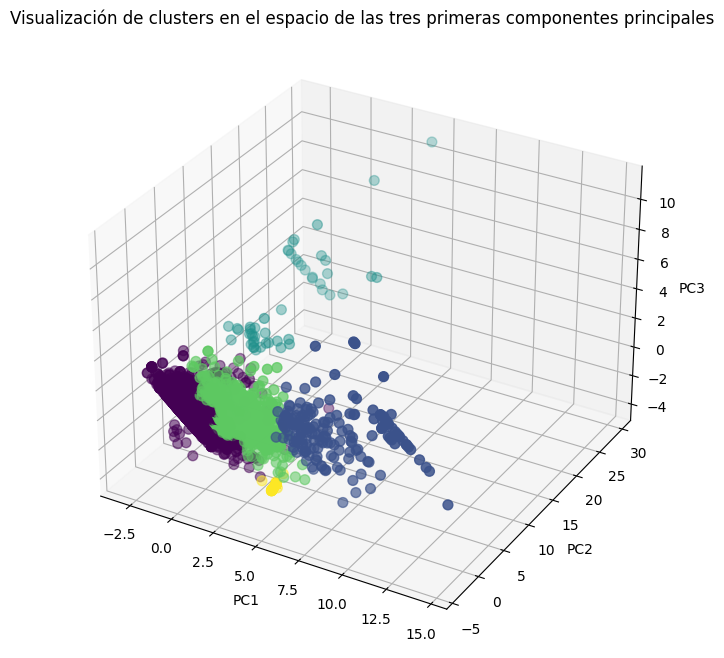

In [96]:
from mpl_toolkits.mplot3d import Axes3D
x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']
cluster_labels = df_pca['cluster_label'].values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=cluster_labels, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualización de clusters en el espacio de las tres primeras componentes principales')
plt.show()